In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label  =  [9 2 1 ... 8 1 5]


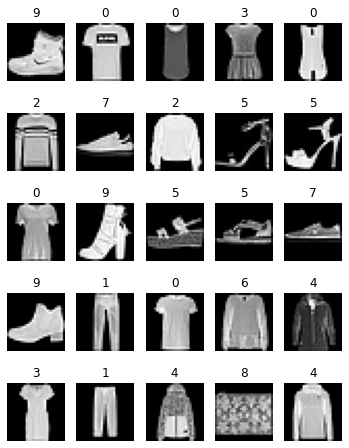

In [4]:
import matplotlib.pyplot as plt

# 100개의 이미지 출력
plt.figure(figsize=(6, 8)) 

for index in range(25):    # 100 개 이미지 출력
    plt.subplot(5, 5, index + 1)  # 10행 10열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    plt.title(str(t_train[index]))
plt.show()

- 0: T-shirt/top
- 1: Trouse
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle Boot

In [5]:
print(x_test[1])

[[  0   0   0   0   0   0   0   0   0   0  13  67   0   0   0   0  50  38
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8 120 209 226 247 237 255 255 255 247 238
  235 172  72   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 137 239 252 243 234 229 238 244 246 240 230 232
  239 248 251 194   0   0   0   0   0   0]
 [  0   0   0   0   0 102 255 231 228 227 228 233 230 230 229 228 232 232
  231 227 224 252 179   0   0   0   0   0]
 [  0   0   0   0   0 233 241 229 231 255 255 238 231 227 238 246 228 230
  227 234 235 229 241  20   0   0   0   0]
 [  0   0   0   0   0 248 241 231 255 149  47 252 228 255 242 216 238 232
  255 228 220 234 250  54   0   0   0   0]
 [  0   0   0   0   0 255 240 232 255  15   0 255 237 191   0   0 214 255
   13 123 255 234 252 114   0   0   0   0]
 [  0   0   0   0   6 255 238 239 255 177   0 255 255   0 130 116  47  65
   43  37 255 236 249 162   0   0   0   0]
 [  0   0   0   0  32 255 236 245 255 204   0 255  84   0  37  2

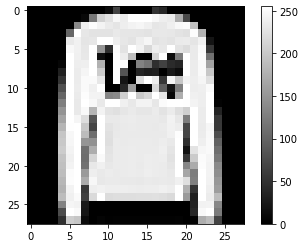

In [6]:
plt.imshow(x_test[1], cmap='gray') 
plt.colorbar()   
plt.show()

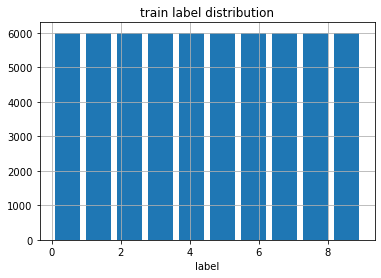

In [7]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train, bins=10, rwidth=0.8)
plt.show()

In [8]:
# 학습데이터 정답 분포 확인
label_distribution = np.zeros(10)

for idx in range(len(t_train)):
    label = int(t_train[idx])
    label_distribution[label] +=1 # label_distribution[label] + 1

print(label_distribution)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [9]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [10]:
# 정답 데이터 원핫 인코딩 (One-Hot Encoding)
#5,0
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10) #5:[0,0,0,0,0,1,0,0,0,0]
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [11]:
#print(x_train[0])
print(t_train[0])
print(t_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #입력층
model.add(tf.keras.layers.Dense(100, activation='relu')) #은닉층
model.add(tf.keras.layers.Dense(10, activation='softmax')) #출력층

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy', #분류할 것이 3개가지 이상이면 categorical_crossentropy을 사용
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
#오버피팅을 확인하기 위해서 validation데이터를 할당함
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3) 

Epoch 1/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5372 - accuracy: 0.8132 - val_loss: 0.4424 - val_accuracy: 0.8428
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3988 - accuracy: 0.8573 - val_loss: 0.3758 - val_accuracy: 0.8629
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3577 - accuracy: 0.8700 - val_loss: 0.3606 - val_accuracy: 0.8713
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3300 - accuracy: 0.8804 - val_loss: 0.3769 - val_accuracy: 0.8656
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8844 - val_loss: 0.3498 - val_accuracy: 0.8761
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8915 - val_loss: 0.3481 - val_accuracy: 0.8805
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2798 - accuracy: 0.8977 - val_loss: 0.3359 - val_accuracy:

In [15]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8837


[0.40169069170951843, 0.8837000131607056]

In [16]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [17]:
predictions[5]

array([2.83956627e-08, 1.00000000e+00, 1.33186561e-12, 3.14758730e-09,
       1.26268676e-08, 5.09542055e-14, 8.26581192e-10, 3.07262766e-20,
       5.95130759e-12, 1.31532156e-17], dtype=float32)

In [18]:
#argmax를 사용하여 predictions[5]에서의 제일 큰 값을 받음
label=np.argmax(predictions[5])
label

1

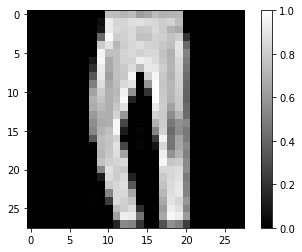

In [19]:
plt.imshow(x_test[5], cmap='gray') 
plt.colorbar()   
plt.show()

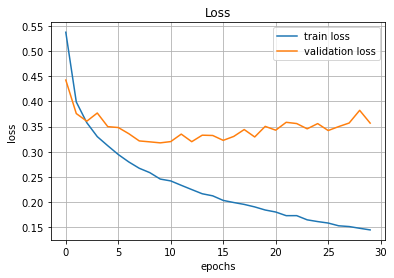

In [20]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

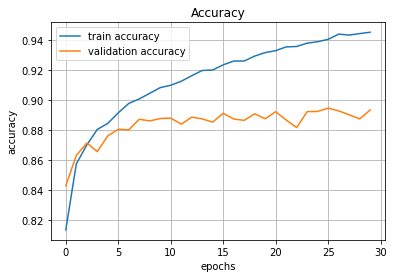

In [21]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 [==============================] - 0s 1ms/step


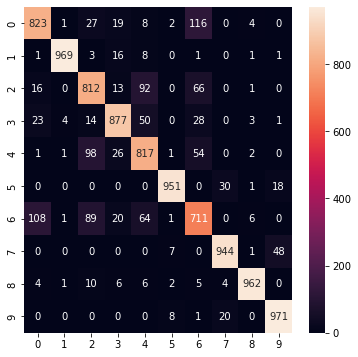

In [23]:
plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

#confusion_matrix를 사용하면 정확하게 몇 개가 분류되었는지 확인할 수 있다.
cm = confusion_matrix(np.argmax(t_test, axis=-1),np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()